**Disclaimer**: functions and methods used in this notebook are covered in the next lessons. Here it is only to generate the tables to show different versions of storing data. If you want to study these examples, come back after the next few notebooks.

In [2]:
import pandas as pd
print(pd.__version__)

import numpy as np

0.19.2


# Organizing data

Topics we will discuss in this lesson are closely related to database management. The concept of *tidy data* was introduced by Hadley Wickham (Chief scientist in **R** project) and was inspired by databases. It turns out that scientists and statisticians can benifit very much from the same concepts. In particular, structuring your data in a tidy way will facilitate any type of analysis you want to do.

The core ideas in this lesson are taken from Hadley Wickham's seminal paper "Tidy data" [1], which IMO every person who works with complex datasets should read. Some examples in this notebook are from that paper, while others I made up myself.

[1] Wickham, H. (2014). Tidy data. Journal of Statistical Software, 59(10), 1-23.

# Tidying: structuring datasets to facilitate analysis

The principles of tidy data provide a standard way to organize data values within a dataset. Current tools often require translation: you have to spend time munging the output from one tool so you can input it into another. Tidy datasets and tools for them work hand in hand to make data analysis easier, allowing you to focus on the interesting domain problem, not on the uninteresting logistics of data.

Let's start with an example.

Consider the following 2 ways of presenting the same toy data. Think about whether there is any difference how we organize it.

In [2]:
untidy = pd.DataFrame({'treatment_a':[np.nan, 16, 3],'treatment_b':[2,11,1]}, 
                      index=['John Smith', 'Jane Doe','Mary Johnson'])
untidy

,treatment_a,treatment_b
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [3]:
untidy.T

,John Smith,Jane Doe,Mary Johnson
treatment_a,NaN,16.0,3.0
treatment_b,2.0,11.0,1.0


A dataset is a collection of values, usually either numbers (if quantitative) or strings (if
qualitative). Values are organized in two ways. Every value belongs to a variable and an
observation. **A variable contains all values that measure the same underlying attribute** (like
height, temperature, duration) across units. **An observation contains all values measured on
the same unit** (like a person, or a day, or a race) across attributes.

Let's restructure the dataset in the following (*tidy*, as we will learn later) way:

In [4]:
untidy.index.name = 'person'
untidy.columns.name = 'treatment'
tidy = pd.melt(untidy.reset_index(),id_vars=['person'],value_name='result')
tidy['treatment'].replace({'treatment_a':'a','treatment_b':'b'}, inplace=True)
tidy

,person,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


This makes it clear that the
dataset contains 18 values representing three variables and six observations. The variables
are:
1. person, with three possible values (John Smith, Mary Johnson, and Jane Doe).
2. treatment, with two possible values (a and b).
3. result, with five or six values depending on how you think of the missing value (—,
16, 3, 2, 11, 1).


# Tidy data
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is
messy or tidy depending on how rows, columns and tables are matched up with observations,
variables and types. Core principles of tidy data are simple:
1. Each **variable** forms a **column**
2. Each **observation** forms a **row**
3. Each **type of observational unit** forms a **table**

In [5]:
tidy

,person,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [6]:
untidy

treatment,treatment_a,treatment_b
person,,
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [43]:
income_untidy = pd.read_csv('data\pew.csv')
income_untidy

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [44]:
income_untidy.shape

(18, 11)

Here there is a `religion` column, which forms a separate variable, but all other columns actually contain the same variable -- `count`. `income` forms another ("groupping") variable:

In [46]:
income_tidy.shape

(180, 3)

In [47]:
income_tidy = pd.melt(income_untidy,id_vars=['religion'],var_name='income',value_name='count')
income_tidy.head(25)

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah's Witness,<$10k,20
9,Jewish,<$10k,19


Some things I can do with untidy as well as with tidy, but what if I wanted to change to proportion for each religion to have certain income, but keep the count as well (because it tells me how precise is the measurement and is need to calculating statistics?

In [48]:
income_tidy['prop_income'] = income_tidy.groupby('religion')['count'].transform(lambda x: x/x.sum()*100)

In [50]:
income_tidy.head()

,religion,income,count,prop_income
0,Agnostic,<$10k,27,3.268765
1,Atheist,<$10k,12,2.330097
2,Buddhist,<$10k,27,6.569343
3,Catholic,<$10k,418,5.189968
4,Don’t know/refused,<$10k,15,5.514706


In [49]:
income_tidy.loc[income_tidy['religion']=='Agnostic']

,religion,income,count,prop_income
0,Agnostic,<$10k,27,3.268765
18,Agnostic,$10-20k,34,4.116223
36,Agnostic,$20-30k,60,7.263923
54,Agnostic,$30-40k,81,9.806295
72,Agnostic,$40-50k,76,9.200969
90,Agnostic,$50-75k,137,16.585956
108,Agnostic,$75-100k,122,14.769976
126,Agnostic,$100-150k,109,13.196126
144,Agnostic,>150k,84,10.169492
162,Agnostic,Don't know/refused,96,11.622276


In [53]:
income_tidy.loc[income_tidy['income']=='>150k'].sort_values('prop_income', ascending=False)

,religion,income,count,prop_income,prop_religion
153,Jewish,>150k,151,22.140762,5.789877
150,Hindu,>150k,54,21.011673,2.070552
145,Atheist,>150k,74,14.368932,2.837423
146,Buddhist,>150k,53,12.895377,2.032209
157,Orthodox,>150k,46,12.672176,1.763804
144,Agnostic,>150k,84,10.169492,3.220859
160,Other World Religions,>150k,4,9.523810,0.153374
158,Other Christian,>150k,12,9.302326,0.460123
159,Other Faiths,>150k,41,9.131403,1.572086
154,Mainline Prot,>150k,634,8.487282,24.309816


Now I can also easily add proportion of religions for each income group:

In [51]:
income_tidy['prop_religion'] = income_tidy.groupby('income')['count'].transform(lambda x: x/x.sum()*100)

In [52]:
income_tidy.loc[income_tidy['religion']=='Agnostic']

,religion,income,count,prop_income,prop_religion
0,Agnostic,<$10k,27,3.268765,1.398964
18,Agnostic,$10-20k,34,4.116223,1.222582
36,Agnostic,$20-30k,60,7.263923,1.787310
54,Agnostic,$30-40k,81,9.806295,2.453059
72,Agnostic,$40-50k,76,9.200969,2.463533
90,Agnostic,$50-75k,137,16.585956,2.642237
108,Agnostic,$75-100k,122,14.769976,3.057644
126,Agnostic,$100-150k,109,13.196126,3.409446
144,Agnostic,>150k,84,10.169492,3.220859
162,Agnostic,Don't know/refused,96,11.622276,1.568371


In [14]:
income_tidy.loc[income_tidy['income']=='>150k'].sort_values('prop_religion',ascending=False)

,religion,income,count,prop_income,prop_religion
154,Mainline Prot,>150k,634,8.487282,24.309816
147,Catholic,>150k,633,7.859449,24.271472
149,Evangelical Prot,>150k,414,4.370777,15.874233
161,Unaffiliated,>150k,258,6.959806,9.892638
153,Jewish,>150k,151,22.140762,5.789877
144,Agnostic,>150k,84,10.169492,3.220859
151,Historically Black Prot,>150k,78,3.909774,2.990798
145,Atheist,>150k,74,14.368932,2.837423
150,Hindu,>150k,54,21.011673,2.070552
146,Buddhist,>150k,53,12.895377,2.032209


Advantages of tidy data:

1. Adding new variables is easy and straightforward. It doesn't complicate the data structure or analysis.

2. When you have structurally missing data (like number of pregnancies for males), you can throw out some observations (in untidy table they will have to exist, although they make no sense)

In [55]:
billboard_untidy.shape

(317, 83)

In [54]:
billboard_untidy = pd.read_csv('data/billboard.csv')
billboard_untidy[billboard_untidy.columns[:10]].head()

,year,artist,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0


If I wanted to look at, say, all songs which reached the 1st place, and see which song did it faster, there is no easy way of doing it in this data form. However, it is very easy to do with tidy data.

In [56]:
billboard_tidy = pd.melt(billboard_untidy,id_vars=['year','artist',
                                                   'track','time','genre',
                                                   'date.entered','date.peaked'],
                        var_name='week',value_name='rank')

def keep_num(string):
    digits_list = [c for c in string if c.isdigit()]
    digits_string = ''.join(digits_list)
    number = int(digits_string)
    return number

billboard_tidy['week'].replace({s:keep_num(s) for s in billboard_tidy['week']}, inplace=True)
billboard_tidy.rename(columns={'date.entered':'entered', 
                               'date.peaked':'peaked'}, 
                      inplace=True)

billboard_tidy['entered'] = pd.to_datetime(billboard_tidy['entered'])
billboard_tidy['peaked'] = pd.to_datetime(billboard_tidy['peaked'])

billboard_tidy.head()

,year,artist,track,time,genre,entered,peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


In [57]:
billboard_tidy.shape

(24092, 9)

In [18]:
billboard_tidy.loc[billboard_tidy['rank']==1].sort_values('week').head(10)

,year,artist,track,time,genre,entered,peaked,week,rank
1588,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,6,1.0
1905,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,7,1.0
2222,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,8,1.0
2227,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,8,1.0
2230,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,8,1.0
2536,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,9,1.0
2537,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,9,1.0
2539,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,9,1.0
2544,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,9,1.0
2547,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,9,1.0


During tidying, each type of observational unit should be stored in its own table. This
is closely related to the idea of database normalization, where each fact is expressed in only
one place. If this is not done, it is possible for inconsistencies to occur.

The Billboard dataset described before actually contains observations on two types of
observational units: the song and its rank in each week. This manifests itself through the
duplication of facts about the song: `year`, `artist`, `track`, `time`, `genre`, `entered` and `peaked` are repeated for every `song` in each `week`.

But this examples is a bit complicated, so let's look at another one, which can be quite frequent in research. Afterwards we will get back to the billboard dataset to reorganize it as well.

In [4]:
# generate subjects data

# number of subjects
n = 10

subjects_id = np.arange(n)

# if you have module `names`, it will generate names with it;
# otherwise, names will be just tokens 'Name Surname #'
try:
    import names
    subjects_names = []
    subjects_gender = []
    for g in ['male','female']:
        for i in np.arange(n/2):
            subjects_names.append(names.get_full_name(gender=g))
            subjects_gender.append(g)
except:
    subjects_names = ['Name Surname {}'.format(i+1) for i in range(n)]
    subjects_gender = ['male','female']*int(n/2)

subjects_age = np.random.randint(15, 85, size=n)

task_names = ['memory_matrix', 'labyrinth', 'math_game', 'names_memory', 'survey_score', 
              'session_1', 'session_2', 'session_3']

In [5]:
# set subjects data into dataframe
df = pd.DataFrame({'id': subjects_id, 'name': subjects_names, 'gender': subjects_gender, 'age': subjects_age})

# generate scores for each task
for subj_id in df.index:
    for task in task_names:
        df.at[subj_id, task] = np.random.randint(100-df.at[subj_id, 'age'], 100)

In [6]:
df

,age,gender,id,name,memory_matrix,labyrinth,math_game,names_memory,survey_score,session_1,session_2,session_3
0,68,male,0,Ross Richard,35.0,35.0,58.0,71.0,38.0,46.0,81.0,55.0
1,33,male,1,Jesus Thompson,74.0,73.0,76.0,96.0,68.0,96.0,71.0,68.0
2,47,male,2,Jonathan Corkill,63.0,89.0,58.0,54.0,90.0,91.0,73.0,97.0
3,39,male,3,Ray Sarwinski,86.0,83.0,80.0,67.0,74.0,88.0,77.0,82.0
4,83,male,4,Jonathan Wingfield,72.0,70.0,45.0,30.0,29.0,58.0,31.0,64.0
5,56,female,5,Louise Viernes,84.0,44.0,59.0,59.0,94.0,68.0,55.0,56.0
6,66,female,6,Bonnie Shae,44.0,61.0,94.0,70.0,64.0,81.0,69.0,99.0
7,48,female,7,Rose Neal,87.0,71.0,69.0,98.0,74.0,88.0,88.0,68.0
8,50,female,8,Alex Campbell,85.0,87.0,98.0,57.0,92.0,54.0,55.0,88.0
9,28,female,9,Josie Vance,90.0,84.0,75.0,91.0,76.0,90.0,89.0,94.0


In [66]:
df_tidy_1 = pd.melt(df, id_vars=['age','gender','name','id'],var_name='task',value_name='score')
df_tidy_1.sort_values('id')

,age,gender,name,id,task,score
0,58,male,Steven Frazier,0,memory_matrix,83.0
20,58,male,Steven Frazier,0,session_1,43.0
16,58,male,Steven Frazier,0,survey_score,60.0
8,58,male,Steven Frazier,0,math_game,60.0
28,58,male,Steven Frazier,0,session_3,74.0
12,58,male,Steven Frazier,0,names_memory,83.0
24,58,male,Steven Frazier,0,session_2,63.0
4,58,male,Steven Frazier,0,labyrinth,79.0
29,42,male,Timothy Taber,1,session_3,65.0
9,42,male,Timothy Taber,1,math_game,62.0


In [23]:
df_tidy_1.groupby('task')['score'].mean()

task
labyrinth        76.833333
math_game        75.833333
memory_matrix    83.000000
names_memory     78.666667
session_1        80.833333
session_2        76.333333
session_3        85.666667
survey_score     79.333333
Name: score, dtype: float64

In [24]:
df_tidy_1.groupby(['gender','task'])['score'].mean()

gender  task         
female  labyrinth        70.333333
        math_game        77.000000
        memory_matrix    72.000000
        names_memory     76.333333
        session_1        73.000000
        session_2        78.666667
        session_3        81.666667
        survey_score     82.333333
male    labyrinth        83.333333
        math_game        74.666667
        memory_matrix    94.000000
        names_memory     81.000000
        session_1        88.666667
        session_2        74.000000
        session_3        89.666667
        survey_score     76.333333
Name: score, dtype: float64

In [25]:
df_tidy_1.groupby('age')['score'].mean()

age
24    87.000
27    84.750
32    88.250
38    74.375
53    70.125
76    72.875
Name: score, dtype: float64

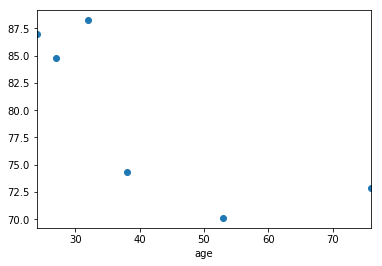

In [26]:
%matplotlib inline
df_tidy_1.groupby('age')['score'].mean().plot(marker='o',linestyle='')

For some applications this is fine. However, if I am interested in the sessions' scores, it is somewhat tedious to work with them. In a way, score on every task is actually a separate variable, because they are not directly comparable. Except for sessions' scores -- they are on the same task and they are directly comparable. How to organize this then? We could treat other scores, except for sessions, as separate variables, and keep scores for sessions and session # as another 2 variables, like so:

In [7]:
df_tidy_2 = pd.melt(df, id_vars=['age','gender','name','id','memory_matrix', 
                     'labyrinth', 'math_game', 'names_memory', 'survey_score'],
                    var_name='session',value_name='score')

df_tidy_2['session'].replace({s:int(s[-1]) for s in df_tidy_2['session'].unique()}, inplace=True)
df_tidy_2.sort_values('id')

,age,gender,name,id,memory_matrix,labyrinth,math_game,names_memory,survey_score,session,score
0,68,male,Ross Richard,0,35.0,35.0,58.0,71.0,38.0,1,46.0
20,68,male,Ross Richard,0,35.0,35.0,58.0,71.0,38.0,3,55.0
10,68,male,Ross Richard,0,35.0,35.0,58.0,71.0,38.0,2,81.0
1,33,male,Jesus Thompson,1,74.0,73.0,76.0,96.0,68.0,1,96.0
21,33,male,Jesus Thompson,1,74.0,73.0,76.0,96.0,68.0,3,68.0
11,33,male,Jesus Thompson,1,74.0,73.0,76.0,96.0,68.0,2,71.0
2,47,male,Jonathan Corkill,2,63.0,89.0,58.0,54.0,90.0,1,91.0
22,47,male,Jonathan Corkill,2,63.0,89.0,58.0,54.0,90.0,3,97.0
12,47,male,Jonathan Corkill,2,63.0,89.0,58.0,54.0,90.0,2,73.0
3,39,male,Ray Sarwinski,3,86.0,83.0,80.0,67.0,74.0,1,88.0


In [8]:
df_tidy_2.groupby('math_game')['score'].mean()

math_game
45.0    51.000000
58.0    73.833333
59.0    59.666667
69.0    81.333333
75.0    91.000000
76.0    78.333333
80.0    82.333333
94.0    83.000000
98.0    65.666667
Name: score, dtype: float64

In [9]:
df_tidy_2.groupby('math_game')['score'].mean().plot(marker='o',linestyle='')

In [10]:
df_tidy_2.groupby(['name','score'])['survey_score'].mean()

name                score
Alex Campbell       54.0     92.0
                    55.0     92.0
                    88.0     92.0
Bonnie Shae         69.0     64.0
                    81.0     64.0
                    99.0     64.0
Jesus Thompson      68.0     68.0
                    71.0     68.0
                    96.0     68.0
Jonathan Corkill    73.0     90.0
                    91.0     90.0
                    97.0     90.0
Jonathan Wingfield  31.0     29.0
                    58.0     29.0
                    64.0     29.0
Josie Vance         89.0     76.0
                    90.0     76.0
                    94.0     76.0
Louise Viernes      55.0     94.0
                    56.0     94.0
                    68.0     94.0
Ray Sarwinski       77.0     74.0
                    82.0     74.0
                    88.0     74.0
Rose Neal           68.0     74.0
                    88.0     74.0
Ross Richard        46.0     38.0
                    55.0     38.0
                    81

In [11]:
df_tidy_2.groupby(['name'])['score'].mean()

name
Alex Campbell         65.666667
Bonnie Shae           83.000000
Jesus Thompson        78.333333
Jonathan Corkill      87.000000
Jonathan Wingfield    51.000000
Josie Vance           91.000000
Louise Viernes        59.666667
Ray Sarwinski         82.333333
Rose Neal             81.333333
Ross Richard          60.666667
Name: score, dtype: float64

In [12]:
task_names[:-3]

['memory_matrix', 'labyrinth', 'math_game', 'names_memory', 'survey_score']

In [13]:
subj_df = df[['age','gender','name','id','memory_matrix', 'labyrinth', 
              'math_game', 'names_memory', 'survey_score']].set_index('id', drop='True')
subj_df

,age,gender,name,memory_matrix,labyrinth,math_game,names_memory,survey_score
id,,,,,,,,
0,68,male,Ross Richard,35.0,35.0,58.0,71.0,38.0
1,33,male,Jesus Thompson,74.0,73.0,76.0,96.0,68.0
2,47,male,Jonathan Corkill,63.0,89.0,58.0,54.0,90.0
3,39,male,Ray Sarwinski,86.0,83.0,80.0,67.0,74.0
4,83,male,Jonathan Wingfield,72.0,70.0,45.0,30.0,29.0
5,56,female,Louise Viernes,84.0,44.0,59.0,59.0,94.0
6,66,female,Bonnie Shae,44.0,61.0,94.0,70.0,64.0
7,48,female,Rose Neal,87.0,71.0,69.0,98.0,74.0
8,50,female,Alex Campbell,85.0,87.0,98.0,57.0,92.0


In [14]:
scores_df = pd.melt(df[['id','session_1','session_2','session_3']],id_vars='id',var_name='session',value_name='score')
scores_df['session'].replace({s:int(s[-1]) for s in scores_df['session'].unique()}, inplace=True)
scores_df

,id,session,score
0,0,1,46.0
1,1,1,96.0
2,2,1,91.0
3,3,1,88.0
4,4,1,58.0
5,5,1,68.0
6,6,1,81.0
7,7,1,88.0
8,8,1,54.0
9,9,1,90.0


In [79]:
pd.merge(subj_df, scores_df, left_index=True, right_on='id')

,age,gender,name,memory_matrix,labyrinth,math_game,names_memory,survey_score,id,session,score
0,58,male,Steven Frazier,83.0,79.0,60.0,83.0,60.0,0,1,43.0
4,58,male,Steven Frazier,83.0,79.0,60.0,83.0,60.0,0,2,63.0
8,58,male,Steven Frazier,83.0,79.0,60.0,83.0,60.0,0,3,74.0
1,42,male,Timothy Taber,58.0,76.0,62.0,73.0,82.0,1,1,95.0
5,42,male,Timothy Taber,58.0,76.0,62.0,73.0,82.0,1,2,76.0
9,42,male,Timothy Taber,58.0,76.0,62.0,73.0,82.0,1,3,65.0
2,24,female,Michelle Burton,91.0,91.0,92.0,98.0,86.0,2,1,86.0
6,24,female,Michelle Burton,91.0,91.0,92.0,98.0,86.0,2,2,86.0
10,24,female,Michelle Burton,91.0,91.0,92.0,98.0,86.0,2,3,91.0
3,21,female,Harriet Coulter,79.0,82.0,90.0,83.0,79.0,3,1,98.0


Now, let's get back to the billboard dataset, and tidy it in the same manner.

In [80]:
billboard_untidy.index.name = 'id'

songs_keys = billboard_untidy.keys()[:7]
songs_df = billboard_untidy[songs_keys]
songs_df.head()

,year,artist,track,time,genre,date.entered,date.peaked
id,,,,,,,
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14


In [81]:
rank_keys = billboard_untidy.keys()[7:]
rank_df = billboard_untidy[rank_keys]
rank_df.index.name = 'id'
rank_df = rank_df.reset_index()
rank_df = pd.melt(rank_df, id_vars='id', var_name = 'week', value_name = 'rank')
rank_df['week'].replace({s:keep_num(s) for s in rank_df['week']}, inplace=True)
rank_df.head(20)

,id,week,rank
0,0,1,78.0
1,1,1,15.0
2,2,1,71.0
3,3,1,41.0
4,4,1,57.0
5,5,1,59.0
6,6,1,83.0
7,7,1,63.0
8,8,1,77.0
9,9,1,81.0


In [38]:
rank_df.tail(20)

,id,week,rank
24072,297,76,NaN
24073,298,76,NaN
24074,299,76,NaN
24075,300,76,NaN
24076,301,76,NaN
24077,302,76,NaN
24078,303,76,NaN
24079,304,76,NaN
24080,305,76,NaN
24081,306,76,NaN


In [39]:
pd.merge(songs_df, rank_df, left_index=True, right_on='id').head()

,year,artist,track,time,genre,date.entered,date.peaked,id,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,1,78.0
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,2,63.0
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,3,49.0
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,4,33.0
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,0,5,23.0


In [40]:
pd.merge(songs_df, rank_df, left_index=True, right_on='id').shape

(24092, 10)

# Afterword

Tidy data is only worthwhile if it
makes analysis easier. **Tidy tools** take tidy datasets as input
and return tidy datasets as output. **Tidy tools** are useful because the output of one tool
can be used as the input to another. This allows you to simply and easily compose multiple
tools to solve a problem. Tidy data also ensures that variables are stored in a consistent,
explicit manner. This makes each tool simpler, because it does not need a Swiss Army knife
of parameters for dealing with different dataset structures.

Tools can be messy for two reasons: either they take messy datasets as input (**messy-input
tools**) or they produce messy datasets as output (**messy-output tools**). Messy-input tools are
typically more complicated than tidy-input tools because they need to include some parts of
the tidying process. This can be useful for common types of messy datasets, but it typically
makes the function more complex, harder to use and harder to maintain. Messy-output tools
are frustrating and slow down analysis because they cannot be easily composed and you must
constantly think about how to convert from one format to another.

We will see examples of messy tools and, more importantly, tidy tools in our future lessons.

# Possible exercises
These are some exercise drafts, some of them became of them will become real exercises, but I may not have thoroughly tested them yet. For example, they may require using somethig which we didn't learn in class. You can try them at your own risk, but it is likely that it is going to be quite difficult :) Try them only after you've studied other notebooks in this lesson (`002_data_organization`). For some exercises I provide my solutions below (they may not be well commented, because it is a draft).

**Exercise 1**: Find top 10 songs, which stayed in the chart for the longest duration (number of weeks). How long have they stayed? Find the song names. **Optional**: do it with the "tidyest" dataset, the one where information about songs and chart info are split into 2 dataframes.

# Solutions

**Exercise 1**

In [41]:
def how_many_nan(x):
    return np.sum(np.isnan(x))

top_durations = len(rank_df['week'].unique()) - rank_df.groupby('id')['rank'].agg(how_many_nan).sort_values().iloc[:10]
top_durations = pd.DataFrame(top_durations)
top_durations.rename(columns={'rank':'dur'}, inplace=True)
top_durations

,dur
id,
46,57.0
9,55.0
24,53.0
17,53.0
13,47.0
28,44.0
12,41.0
15,39.0
20,37.0


In [42]:
pd.merge(top_durations, songs_df, left_index=True, right_index=True)

,dur,year,artist,track,time,genre,date.entered,date.peaked
id,,,,,,,,
9,55.0,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04
12,41.0,2000,Vertical Horizon,Everything You Want,4:01,Rock,2000-01-22,2000-07-15
13,47.0,2000,Creed,With Arms Wide Open,3:52,Rock,2000-05-13,2000-11-11
15,39.0,2000,matchbox twenty,Bent,4:12,Rock,2000-04-29,2000-07-22
17,53.0,2000,"Hill, Faith",Breathe,4:04,Rap,1999-11-06,2000-04-22
20,37.0,2000,"Braxton, Toni",He Wasn't Man Enough,4:21,Rock,2000-03-18,2000-05-06
24,53.0,2000,3 Doors Down,Kryptonite,3:53,Rock,2000-04-08,2000-11-11
28,44.0,2000,Joe,I Wanna Know,4:57,Rock,2000-01-01,2000-07-01
46,57.0,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22
